# Importation

In [342]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import ast
from collections import Counter


In [343]:
df_lyon = pd.read_csv('listings_lyon.csv', sep=',', encoding='utf-8')
df_paris = pd.read_csv('listings_paris.csv', sep=',', encoding='utf-8')

# AED

In [344]:
df_lyon.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [345]:
df_lyon.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [346]:
# Fusionner les deux colonnes en supprimant les doublons
merged_columns = pd.concat([df_lyon, df_paris], ignore_index=True)

In [347]:
# Liste des colonnes peu pertinentes pour la prédiction du prix
cols_to_drop = [
    'id',
    'listing_url',
    'scrape_id',
    'last_scraped',
    'source',
    'neighbourhood_group_cleansed',
    'picture_url',
    'calendar_updated',
    'host_url',
  
    'host_since',

    'host_about',
    'host_response_time',
    'host_response_rate',
    'host_acceptance_rate',
    'host_thumbnail_url',
    'host_picture_url',






    'license'
]

# Suppression des colonnes non pertinentes
df_paris.drop(columns=cols_to_drop, inplace=True)
df_lyon.drop(columns=cols_to_drop, inplace=True)

In [348]:
df = pd.concat([df_paris, df_lyon], ignore_index=True)

In [349]:
# Filtrer les colonnes avec 100% de valeurs manquantes
columns_with_100_percent_missing = null_percentage[null_percentage == 100]
print(columns_with_100_percent_missing)

Series([], dtype: float64)


In [350]:
df

,name,description,neighborhood_overview,host_id,host_name,host_location,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,...,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d
0,zen and calm,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,3631,Anne,"Paris, France",f,Alésia,1.0,1.0,...,t,1,1,0,0,0.05,NaN,NaN,NaN,NaN
1,Your perfect Paris studio on Île Saint-Louis,"NEW SOFA-BED SINCE JUNE 2023, Please disregard...","You are within walking distance to the Louvre,...",7903,Borzou,"Paris, France",NaN,Saint-Paul - Ile Saint-Louis,2.0,4.0,...,f,1,1,0,0,2.26,NaN,NaN,NaN,NaN
2,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !",NaN,2626,Franck,"Paris, France",t,Le Marais,2.0,10.0,...,f,2,2,0,0,2.20,NaN,NaN,NaN,NaN
3,Sunny apartment with balcony,"We are renting our a spacious, sunny fully fur...",NaN,22155,Anaïs,"Paris, France",f,Gare du Nord - Gare de I'Est,1.0,1.0,...,f,1,1,0,0,0.03,NaN,NaN,NaN,NaN
4,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",Location! Location! Location! Just bring your ...,NaN,28422,Bernadette,"New York, NY",f,Châtelet - Les Halles - Beaubourg,2.0,4.0,...,f,1,1,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100440,Suite Coraline,Enjoy a stylish and central home.,NaN,651608878,Pablo,NaN,f,NaN,59.0,68.0,...,t,29,29,0,0,NaN,273.0,0.0,0.0,0.0
100441,Suite Coachella,"Make life easier at this peaceful, centrally l...",NaN,651608878,Pablo,NaN,f,NaN,59.0,68.0,...,t,29,29,0,0,NaN,291.0,0.0,0.0,0.0
100442,Suite Lavani,Enjoy with your family this fabulous place tha...,NaN,651608878,Pablo,NaN,f,NaN,59.0,68.0,...,t,29,29,0,0,NaN,264.0,0.0,0.0,0.0
100443,Suite Miramar,This peaceful home offers a relaxing stay for ...,NaN,651608878,Pablo,NaN,f,NaN,59.0,68.0,...,t,29,29,0,0,NaN,279.0,0.0,0.0,0.0


In [351]:
df.dropna(inplace=True)

In [352]:
df.head()

,name,description,neighborhood_overview,host_id,host_name,host_location,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,...,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d
91031,"Duplex avec vue, centre ville",Beautifull duplex terrace on Lyon's roofs ! Co...,"the general atmosphere, the magnificent archit...",269557,Isabelle,"Lyon, France",f,5th Arrondissement,1.0,3.0,...,f,1,1,0,0,0.32,298.0,1.0,60.0,7260.0
91033,"Centre of old town,home sweet home",Ideal situation and cosy..In the center of the...,It's more than charming!<br />It's the most be...,660135,Polali,"Lyon, France",f,5th Arrondissement,1.0,2.0,...,f,1,1,0,0,0.80,83.0,2.0,12.0,924.0
91035,Quartier Terreaux 4/6 pers. Hyper centre / Clim,"In a typical Lyonnais building, this beautiful...",A prime location in the center of the city of ...,832917,Giuseppina,"Rhône-Alpes, France",f,1st Arrondissement,5.0,5.0,...,f,2,2,0,0,2.96,0.0,33.0,162.0,28188.0
91038,Studio apartment near opera city centre,"Studio 30 m2 , bathroom 5 sqm. it is located...",you will be in the Typical historical croix Ro...,1319577,Emmanuel,"Lyon, France",t,1st Arrondissement,1.0,1.0,...,f,1,1,0,0,0.11,205.0,5.0,168.0,6720.0
91040,"★SAXE & THE CITY★ 90m², Quiet, Balcony, Clean+...","Prestige French style apartment, 90 sqm, on th...",Saxe-Gambetta is an authentic area on the left...,1738855,Amael Et Ida,"Lyon, France",t,3rd Arrondissement,1.0,3.0,...,t,1,1,0,0,2.32,170.0,37.0,198.0,30690.0


In [353]:
df.isnull().sum().sum()

np.int64(0)

In [354]:
df.drop_duplicates(inplace=True)

In [355]:
df.head()

,name,description,neighborhood_overview,host_id,host_name,host_location,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,...,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d
91031,"Duplex avec vue, centre ville",Beautifull duplex terrace on Lyon's roofs ! Co...,"the general atmosphere, the magnificent archit...",269557,Isabelle,"Lyon, France",f,5th Arrondissement,1.0,3.0,...,f,1,1,0,0,0.32,298.0,1.0,60.0,7260.0
91033,"Centre of old town,home sweet home",Ideal situation and cosy..In the center of the...,It's more than charming!<br />It's the most be...,660135,Polali,"Lyon, France",f,5th Arrondissement,1.0,2.0,...,f,1,1,0,0,0.80,83.0,2.0,12.0,924.0
91035,Quartier Terreaux 4/6 pers. Hyper centre / Clim,"In a typical Lyonnais building, this beautiful...",A prime location in the center of the city of ...,832917,Giuseppina,"Rhône-Alpes, France",f,1st Arrondissement,5.0,5.0,...,f,2,2,0,0,2.96,0.0,33.0,162.0,28188.0
91038,Studio apartment near opera city centre,"Studio 30 m2 , bathroom 5 sqm. it is located...",you will be in the Typical historical croix Ro...,1319577,Emmanuel,"Lyon, France",t,1st Arrondissement,1.0,1.0,...,f,1,1,0,0,0.11,205.0,5.0,168.0,6720.0
91040,"★SAXE & THE CITY★ 90m², Quiet, Balcony, Clean+...","Prestige French style apartment, 90 sqm, on th...",Saxe-Gambetta is an authentic area on the left...,1738855,Amael Et Ida,"Lyon, France",t,3rd Arrondissement,1.0,3.0,...,t,1,1,0,0,2.32,170.0,37.0,198.0,30690.0


In [356]:
null_percentage = (df.isnull().sum() / len(df)) * 100
print(null_percentage)
print(df.shape)

name                         0.0
description                  0.0
neighborhood_overview        0.0
host_id                      0.0
host_name                    0.0
                            ... 
reviews_per_month            0.0
availability_eoy             0.0
number_of_reviews_ly         0.0
estimated_occupancy_l365d    0.0
estimated_revenue_l365d      0.0
Length: 62, dtype: float64
(964, 62)


In [357]:
# Extraire le symbole de la colonne 'price'
df['currency_symbol'] = df['price'].str.extract(r'(\D)')

#On retire le symbole de la colonne 'price'
df['price'] = df['price'].str.replace(r'(\D)', '', regex=True)

#O convertit la colonne 'price' en float
df['price'] = df['price'].astype(float)

In [358]:

# Convertir la chaîne de texte en liste Python
df['amenities_list'] = df['amenities'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

df['num_amenities'] = df['amenities_list'].apply(len)


# Récupérer les 20 équipements les plus fréquents
all_amenities = df['amenities_list'].explode()
top_amenities = [amenity for amenity, _ in Counter(all_amenities).most_common(20)]

# Créer une colonne binaire par équipement
for amenity in top_amenities:
    df[f'amenity_{amenity.lower().replace(" ", "_").replace("-", "_")}'] = df['amenities_list'].apply(lambda x: int(amenity in x))


In [359]:
correlations = df.corr(numeric_only=True)
print(correlations)

                              host_id  host_listings_count  \
host_id                      1.000000             0.377592   
host_listings_count          0.377592             1.000000   
host_total_listings_count    0.384726             0.999843   
latitude                     0.009374             0.068585   
longitude                    0.069508            -0.034331   
...                               ...                  ...   
amenity_shampoo              0.028069             0.104996   
amenity_hot_water_kettle     0.096174             0.057477   
amenity_oven                -0.043383             0.065374   
amenity_dedicated_workspace  0.044436            -0.037093   
amenity_dishwasher          -0.102466             0.092903   

                             host_total_listings_count  latitude  longitude  \
host_id                                       0.384726  0.009374   0.069508   
host_listings_count                           0.999843  0.068585  -0.034331   
host_total_listing

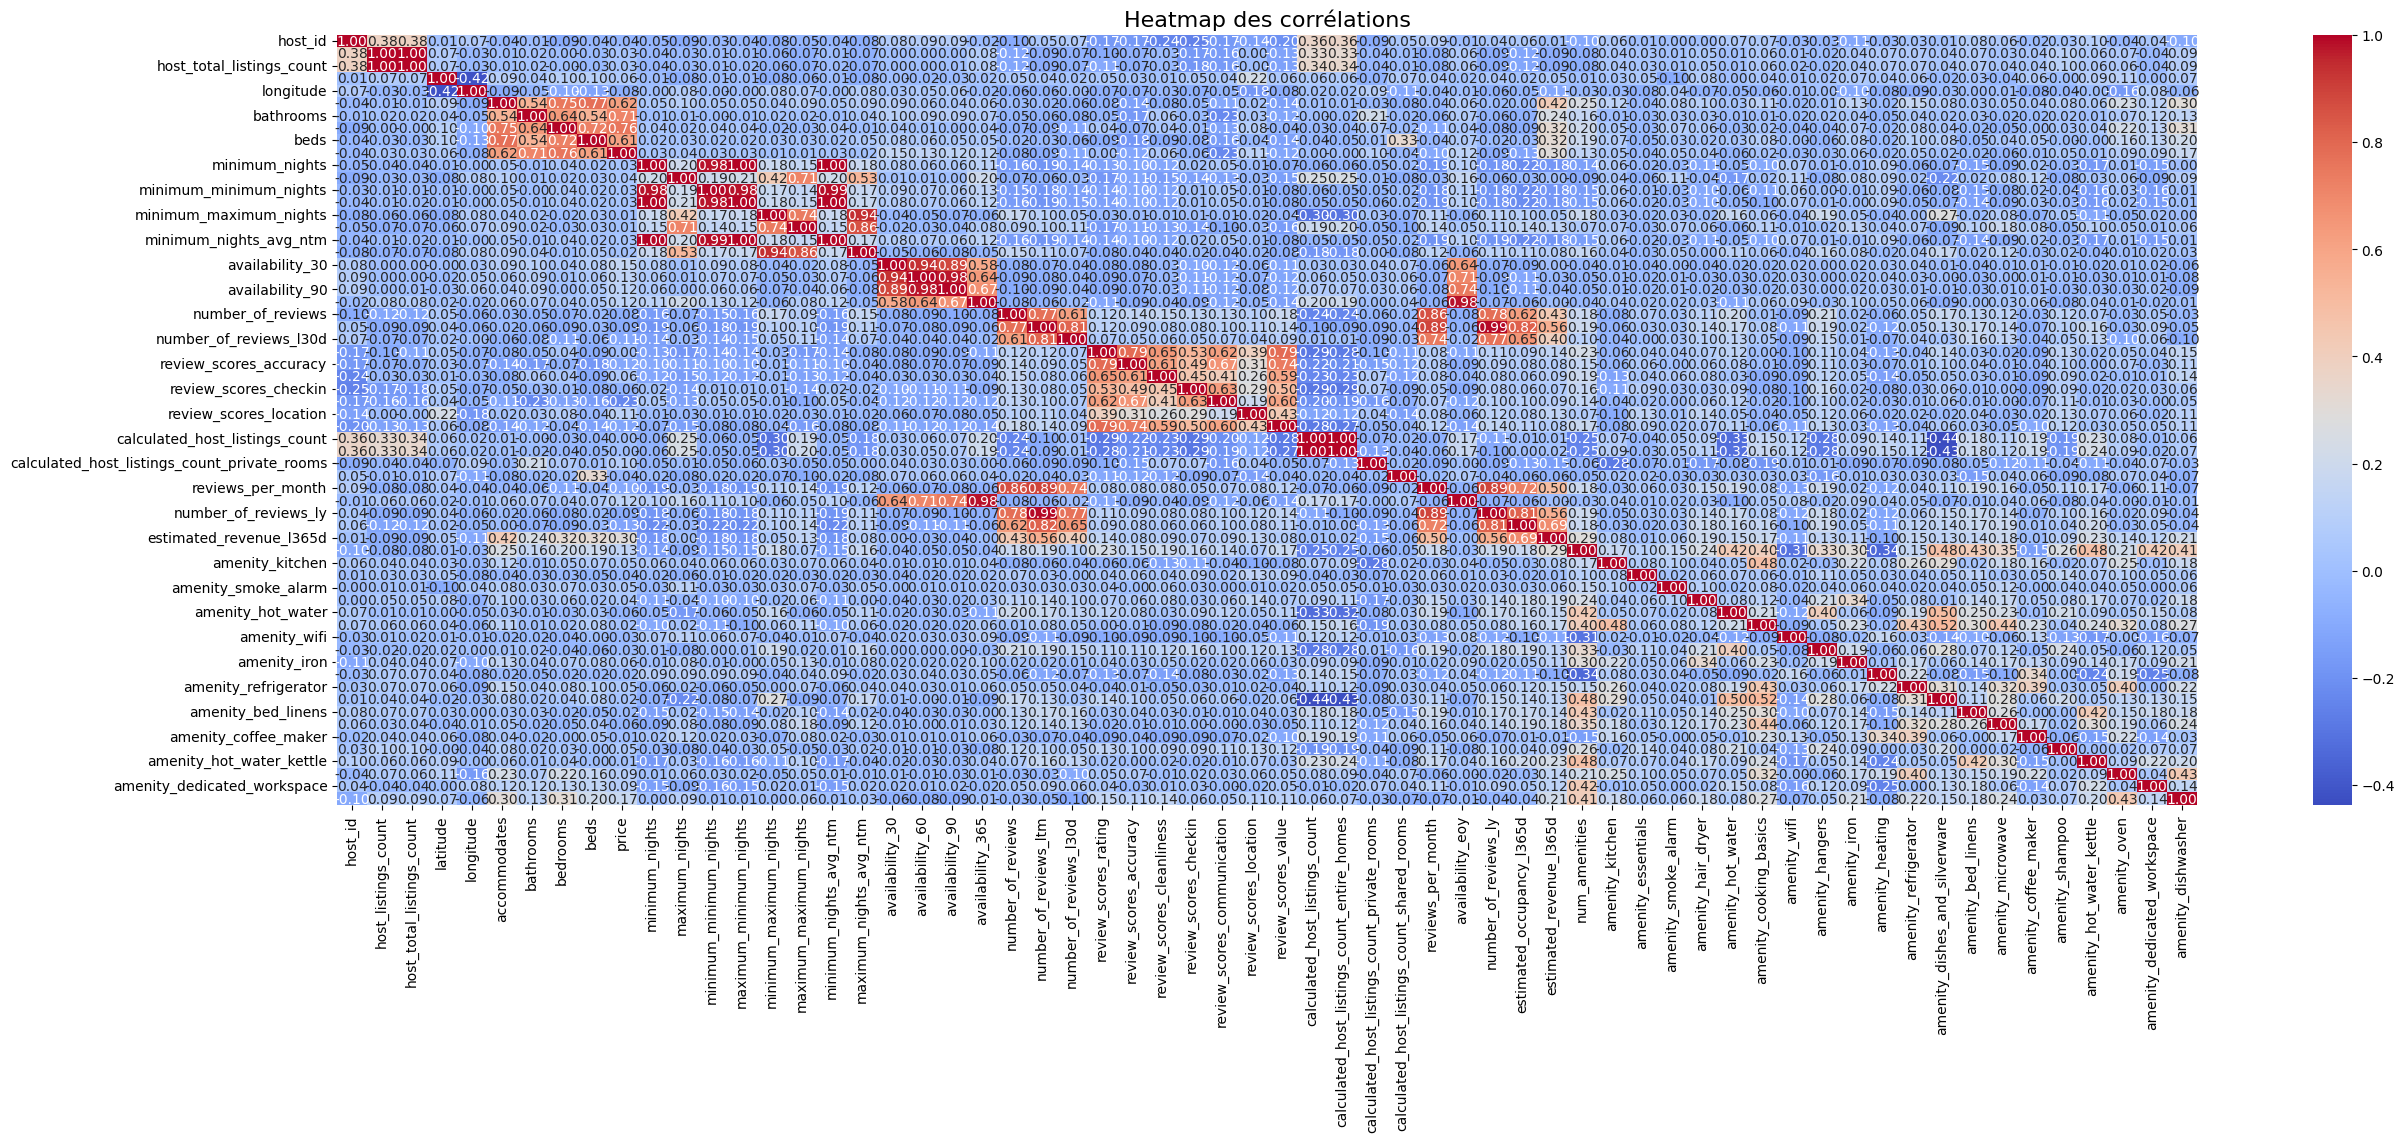

In [360]:
# Création du heatmap
plt.figure(figsize=(30, 10))
sns.heatmap(correlations, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Ajouter un titre
plt.title("Heatmap des corrélations", fontsize=16)

# Afficher le graphique
plt.show()

In [361]:
correlations['price'].sort_values(ascending=False)

price                          1.000000
bedrooms                       0.756972
bathrooms                      0.710772
accommodates                   0.617176
beds                           0.609573
                                 ...   
number_of_reviews_l30d        -0.108697
review_scores_accuracy        -0.116039
review_scores_value           -0.120157
estimated_occupancy_l365d     -0.127623
review_scores_communication   -0.234953
Name: price, Length: 62, dtype: float64

In [362]:
df.head()

,name,description,neighborhood_overview,host_id,host_name,host_location,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,...,amenity_refrigerator,amenity_dishes_and_silverware,amenity_bed_linens,amenity_microwave,amenity_coffee_maker,amenity_shampoo,amenity_hot_water_kettle,amenity_oven,amenity_dedicated_workspace,amenity_dishwasher
91031,"Duplex avec vue, centre ville",Beautifull duplex terrace on Lyon's roofs ! Co...,"the general atmosphere, the magnificent archit...",269557,Isabelle,"Lyon, France",f,5th Arrondissement,1.0,3.0,...,1,1,1,0,1,1,0,0,1,1
91033,"Centre of old town,home sweet home",Ideal situation and cosy..In the center of the...,It's more than charming!<br />It's the most be...,660135,Polali,"Lyon, France",f,5th Arrondissement,1.0,2.0,...,1,1,1,1,1,0,1,1,0,0
91035,Quartier Terreaux 4/6 pers. Hyper centre / Clim,"In a typical Lyonnais building, this beautiful...",A prime location in the center of the city of ...,832917,Giuseppina,"Rhône-Alpes, France",f,1st Arrondissement,5.0,5.0,...,1,1,1,1,1,1,1,1,1,1
91038,Studio apartment near opera city centre,"Studio 30 m2 , bathroom 5 sqm. it is located...",you will be in the Typical historical croix Ro...,1319577,Emmanuel,"Lyon, France",t,1st Arrondissement,1.0,1.0,...,0,1,1,1,1,0,1,0,1,0
91040,"★SAXE & THE CITY★ 90m², Quiet, Balcony, Clean+...","Prestige French style apartment, 90 sqm, on th...",Saxe-Gambetta is an authentic area on the left...,1738855,Amael Et Ida,"Lyon, France",t,3rd Arrondissement,1.0,3.0,...,1,1,1,1,1,1,1,1,1,1


In [363]:
df.dtypes

name                           object
description                    object
neighborhood_overview          object
host_id                         int64
host_name                      object
                                ...  
amenity_shampoo                 int64
amenity_hot_water_kettle        int64
amenity_oven                    int64
amenity_dedicated_workspace     int64
amenity_dishwasher              int64
Length: 85, dtype: object

In [364]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Application du LabelEncoder sur la colonne property_type
df['has_availability'] = le.fit_transform(df['has_availability'])
df['host_is_superhost'] = le.fit_transform(df['host_is_superhost'])
df['host_has_profile_pic'] = le.fit_transform(df['host_has_profile_pic'])
df['host_identity_verified'] = le.fit_transform(df['host_identity_verified'])
	

In [365]:
df['has_availability'].dtypes

dtype('int64')

In [366]:
df.head()

,name,description,neighborhood_overview,host_id,host_name,host_location,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,...,amenity_refrigerator,amenity_dishes_and_silverware,amenity_bed_linens,amenity_microwave,amenity_coffee_maker,amenity_shampoo,amenity_hot_water_kettle,amenity_oven,amenity_dedicated_workspace,amenity_dishwasher
91031,"Duplex avec vue, centre ville",Beautifull duplex terrace on Lyon's roofs ! Co...,"the general atmosphere, the magnificent archit...",269557,Isabelle,"Lyon, France",0,5th Arrondissement,1.0,3.0,...,1,1,1,0,1,1,0,0,1,1
91033,"Centre of old town,home sweet home",Ideal situation and cosy..In the center of the...,It's more than charming!<br />It's the most be...,660135,Polali,"Lyon, France",0,5th Arrondissement,1.0,2.0,...,1,1,1,1,1,0,1,1,0,0
91035,Quartier Terreaux 4/6 pers. Hyper centre / Clim,"In a typical Lyonnais building, this beautiful...",A prime location in the center of the city of ...,832917,Giuseppina,"Rhône-Alpes, France",0,1st Arrondissement,5.0,5.0,...,1,1,1,1,1,1,1,1,1,1
91038,Studio apartment near opera city centre,"Studio 30 m2 , bathroom 5 sqm. it is located...",you will be in the Typical historical croix Ro...,1319577,Emmanuel,"Lyon, France",1,1st Arrondissement,1.0,1.0,...,0,1,1,1,1,0,1,0,1,0
91040,"★SAXE & THE CITY★ 90m², Quiet, Balcony, Clean+...","Prestige French style apartment, 90 sqm, on th...",Saxe-Gambetta is an authentic area on the left...,1738855,Amael Et Ida,"Lyon, France",1,3rd Arrondissement,1.0,3.0,...,1,1,1,1,1,1,1,1,1,1


In [367]:
from sklearn.preprocessing import LabelEncoder

# Encoder toutes les colonnes
for column in df.columns:
    if df[column].dtype == 'object':  # Si la colonne est de type object (catégorique)
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))
    else:  # Si la colonne est numérique
        df[column] = df[column].fillna(0)  # Remplir les valeurs manquantes avec 0 (ou une autre valeur par défaut)

In [373]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [374]:
# X = df.drop(columns=['price'])
# y = df['price']


In [375]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [376]:
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# rfe = RFE(estimator=model, n_features_to_select=10)  # Choisis combien de features tu veux garder

# rfe.fit(X_train, y_train)


In [377]:
# # Liste des features sélectionnées
# selected_features = X.columns[rfe.support_]
# print("Features sélectionnées :", list(selected_features))

# # Tu peux ensuite entraîner ton modèle final sur ces features :
# X_train_rfe = X_train[selected_features]
# X_test_rfe = X_test[selected_features]

# model.fit(X_train_rfe, y_train)
# y_pred = model.predict(X_test_rfe)

# print("RMSE :", mean_squared_error(y_test, y_pred))


In [379]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sélection des colonnes pertinentes pour la prédiction
features = ['name', 'neighborhood_overview', 'host_name', 'host_listings_count', 'bathrooms', 'amenities', 'minimum_maximum_nights', 'first_review', 'last_review', 'review_scores_location']
target = 'price'

# Préparation des données
X = df[features]
y = df[target]

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création et entraînement du modèle de régression linéaire
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 30661243.457090512
R² Score: 0.7196400527127544
